# Importing Required Libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing dataset:

In [5]:
sales_data = pd.read_csv('/content/drive/MyDrive/SALESDATA.xls - AmazonFoodCategory_1 Dataset.csv', parse_dates=['DateKey','Invoice Date', 'Promised Delivery Date'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


NOTE: If a column or index contains an unparsable date, the entire column or
      index will be returned unaltered as an object data type. If you don't want to
      parse some cells as date just change their type in Excel to "Text".
      For non-standard datetime parsing, use ``pd.to_datetime`` after ``pd.read_excel``

In [6]:
sales_data.head()

,CustKey,DateKey,Discount Amount,Invoice Date,Invoice Number,Item Class,Item Number,Item,Line Number,List Price,...,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep,U/M,Unnamed: 20,Unnamed: 21
0,10000481,2017-04-30,-237.91,2017-04-30,100012,NaN,NaN,Urban Large Eggs,2000,0.00,...,237.91,0.00,0.0,237.91,237.910000,1,184,EA,NaN,U/M = unit of measure
1,10002220,2017-07-14,368.79,2017-07-14,100233,P01,20910,Moms Sliced Turkey,1000,824.96,...,456.17,824.96,0.0,456.17,456.170000,1,127,EA,NaN,NaN
2,10002220,2017-10-17,109.73,2017-10-17,116165,P01,38076,Cutting Edge Foot-Long Hot Dogs,1000,548.66,...,438.93,548.66,0.0,438.93,438.930000,1,127,EA,NaN,EA = each
3,10002489,2017-06-03,-211.75,2017-06-03,100096,NaN,NaN,Kiwi Lox,1000,0.00,...,211.75,0.00,0.0,211.75,211.750000,1,160,EA,NaN,NaN
4,10004516,2017-05-27,96627.94,2017-05-27,103341,P01,60776,High Top Sweet Onion,1000,408.52,...,89248.66,185876.60,0.0,89248.66,196.150901,455,124,SE,NaN,SE = some SI unit like kgs or gallons


In [7]:
#checking the shape
sales_data.shape

(65282, 22)

In [8]:
sales_data.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [10]:
#checking no. of null values
sales_data.isnull().sum()

CustKey                                 0
DateKey                                 0
Discount Amount                         2
Invoice Date                            0
Invoice Number                          0
Item Class                           8289
Item Number                            41
Item                                    0
Line Number                             0
List Price                              0
Order Number                            0
Promised Delivery Date                  0
Sales Amount                            0
Sales Amount Based on List Price        0
Sales Cost Amount                       0
Sales Margin Amount                     0
Sales Price                             1
Sales Quantity                          0
Sales Rep                               0
U/M                                     0
Unnamed: 20                         65282
Unnamed: 21                         65278
dtype: int64

In [11]:
sales_data1 = sales_data.copy()

In [12]:
sales_data1['Item Class'].value_counts()

P01    56977
PO1       16
Name: Item Class, dtype: int64

In [13]:
#removing null values 
sales_data1.drop(['Unnamed: 20','Unnamed: 21'],axis=1,inplace= True)

In [14]:
#generating descriptive statistics
sales_data1.describe()

,CustKey,Discount Amount,Invoice Number,Line Number,List Price,Order Number,Sales Amount,Sales Amount Based on List Price,Sales Cost Amount,Sales Margin Amount,Sales Price,Sales Quantity,Sales Rep
count,6.528200e+04,65280.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65282.000000,65281.000000,65282.000000,65282.000000
mean,1.001770e+07,1855.574835,216223.662020,23713.849790,514.693380,180583.064352,2852.038373,4707.473613,1660.979228,1191.059145,283.615913,45.084311,137.422398
std,7.176148e+03,9037.140888,94992.281866,32664.024053,449.189182,67593.871116,15164.342107,20696.443785,9556.485250,5860.787502,252.876719,429.661793,26.643936
min,1.000045e+07,-255820.800000,100012.000000,1000.000000,0.000000,100838.000000,200.010000,0.000000,0.000000,-3932.930000,-5000.000000,-1.000000,103.000000
25%,1.001272e+07,246.037500,117931.000000,3000.000000,181.560000,115321.000000,308.387500,561.040000,167.790000,129.950000,100.070000,2.000000,113.000000
50%,1.001966e+07,441.760000,222869.500000,12000.000000,325.190000,203702.000000,553.940000,998.160000,304.500000,246.490000,183.757500,3.000000,134.000000
75%,1.002351e+07,999.760000,314318.750000,32000.000000,803.860000,218576.000000,1280.042500,2315.040000,687.320000,579.530000,448.220000,8.000000,160.000000
max,1.002758e+07,343532.660000,332842.000000,344000.000000,2760.700000,321532.000000,555376.000000,632610.160000,366576.000000,188800.000000,6035.000000,16000.000000,185.000000


In [15]:
# creating Year, Month, Quarter, Day Columns in sales_data1

sales_data1['Invoice_Year']= sales_data['Invoice Date'].dt.year
sales_data1['Invoice_Month']= sales_data['Invoice Date'].dt.month
sales_data1['Invoice_Quarter']= sales_data['Invoice Date'].dt.quarter
sales_data1['Invoice_Day']= sales_data['Invoice Date'].dt.day

In [16]:
sales_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65282 entries, 0 to 65281
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   CustKey                           65282 non-null  int64         
 1   DateKey                           65282 non-null  datetime64[ns]
 2   Discount Amount                   65280 non-null  float64       
 3   Invoice Date                      65282 non-null  datetime64[ns]
 4   Invoice Number                    65282 non-null  int64         
 5   Item Class                        56993 non-null  object        
 6   Item Number                       65241 non-null  object        
 7   Item                              65282 non-null  object        
 8   Line Number                       65282 non-null  int64         
 9   List Price                        65282 non-null  float64       
 10  Order Number                      65282 non-nu

In [17]:
# Creating DataFrame only with necessary values.
sales_data2 = sales_data1[['CustKey', 'Item','Invoice Date','Invoice_Year','Invoice_Quarter','Invoice_Month','Invoice_Day',
                          'Sales Quantity','Sales Amount','Sales Amount Based on List Price','Discount Amount','Sales Margin Amount',
                          'Sales Cost Amount','Sales Rep','U/M','List Price','Sales Price']]

In [18]:
sales_data2.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     2
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         1
dtype: int64

In [19]:
#removed the null values from the columns
sales_data2.dropna(subset=['Discount Amount','Sales Price'],axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
sales_data2.isnull().sum()

CustKey                             0
Item                                0
Invoice Date                        0
Invoice_Year                        0
Invoice_Quarter                     0
Invoice_Month                       0
Invoice_Day                         0
Sales Quantity                      0
Sales Amount                        0
Sales Amount Based on List Price    0
Discount Amount                     0
Sales Margin Amount                 0
Sales Cost Amount                   0
Sales Rep                           0
U/M                                 0
List Price                          0
Sales Price                         0
dtype: int64

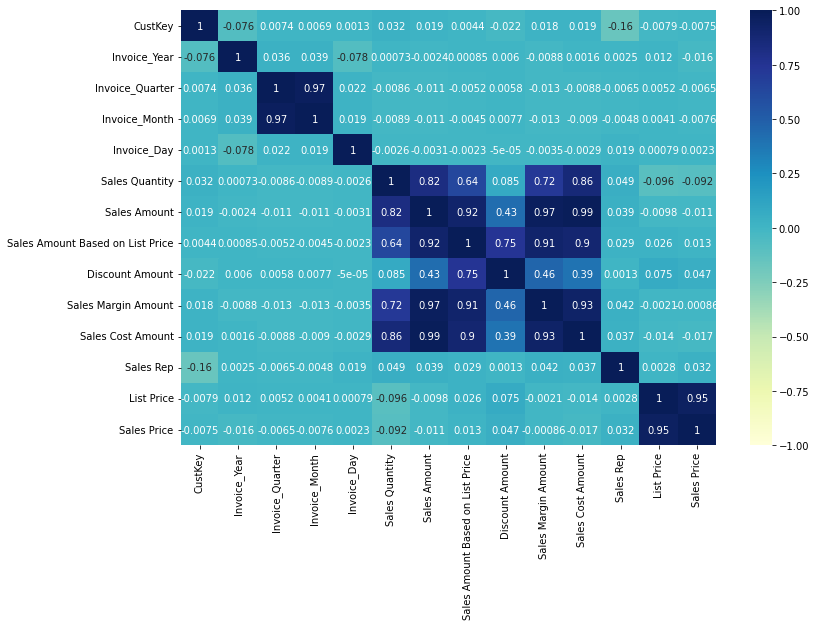

In [21]:
#checking the correlation
plt.figure(figsize=(12,8))
sns.heatmap(sales_data2.corr(method='pearson'),annot=True, vmin=-1, vmax=1, cmap='YlGnBu')

Observations:

1- Discount Amount is highly related to Sales Amount, Sales Cost Amount, Sales Amount Based on List Price & Sales Margin Amount and moderately related to Sales Quantity.

2- List Price highly related to sales price and has no relations with Sales amount, Sales cost amount, Sales amount based on list price & sales margin amount.

3- Sales quantity is moderately related to Sales amount, discount amount, sales margin amount.

4- Their is no relation Between Sales Rep and Sales Amount, Sales Margin Amount.

In [22]:
sales_data2.head()

,CustKey,Item,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price
0,10000481,Urban Large Eggs,2017-04-30,2017,2,4,30,1,237.91,0.00,-237.91,237.91,0.0,184,EA,0.00,237.910000
1,10002220,Moms Sliced Turkey,2017-07-14,2017,3,7,14,1,456.17,824.96,368.79,456.17,0.0,127,EA,824.96,456.170000
2,10002220,Cutting Edge Foot-Long Hot Dogs,2017-10-17,2017,4,10,17,1,438.93,548.66,109.73,438.93,0.0,127,EA,548.66,438.930000
3,10002489,Kiwi Lox,2017-06-03,2017,2,6,3,1,211.75,0.00,-211.75,211.75,0.0,160,EA,0.00,211.750000
4,10004516,High Top Sweet Onion,2017-05-27,2017,2,5,27,455,89248.66,185876.60,96627.94,89248.66,0.0,124,SE,408.52,196.150901


In [23]:
sales_data2.tail()

,CustKey,Item,Invoice Date,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,U/M,List Price,Sales Price
65277,10017638,High Top Oranges,2018-03-21,2018,1,3,21,9,569.90,1075.68,505.78,329.95,239.95,180,EA,119.52,63.322222
65278,10017638,Landslide White Sugar,2018-03-21,2018,1,3,21,2,462.81,873.56,410.75,39.26,423.55,180,EA,436.78,231.405000
65279,10017638,Moms Potato Salad,2018-03-21,2018,1,3,21,8,987.20,1863.36,876.16,413.20,574.00,180,EA,232.92,123.400000
65280,10017638,Better Fancy Canned Sardines,2018-03-21,2018,1,3,21,36,27297.51,51524.28,24226.77,11108.61,16188.90,180,EA,1431.23,758.264167
65281,10017638,Imagine Popsicles,2018-03-21,2018,1,3,21,48,27582.02,52061.28,24479.26,13347.80,14234.22,180,EA,1084.61,574.625417


In [24]:
sales_data2.shape

(65280, 17)

In [25]:
sales_data2.Item.value_counts()

Better Fancy Canned Sardines    1648
Ebony Prepared Salad            1471
Moms Sliced Turkey              1192
Imagine Popsicles               1191
Discover Manicotti              1126
                                ... 
Fast Salted Pretzels               1
Great Bagels                       1
Imagine Frozen Cauliflower         1
Jeffers Corn Puffs                 1
Bravo Fancy Canned Sardines        1
Name: Item, Length: 657, dtype: int64

In [26]:
sales_data2.describe()

,CustKey,Invoice_Year,Invoice_Quarter,Invoice_Month,Invoice_Day,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,6.528000e+04,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000,65280.000000
mean,1.001770e+07,2017.960907,2.414246,6.307001,16.155898,45.085708,2852.043002,4707.617837,1855.574835,1191.012887,1661.030116,137.423192,514.709149,283.696851
std,7.176244e+03,0.946607,1.160954,3.563558,8.795338,429.668301,15164.569043,20696.744425,9037.140888,5860.857507,9556.627220,26.643926,449.187029,252.031660
min,1.000045e+07,2017.000000,1.000000,1.000000,1.000000,1.000000,200.010000,0.000000,-255820.800000,-3932.930000,0.000000,103.000000,0.000000,0.337341
25%,1.001272e+07,2017.000000,1.000000,3.000000,9.000000,2.000000,308.380000,561.040000,246.037500,129.947500,167.790000,113.000000,181.560000,100.070000
50%,1.001966e+07,2018.000000,2.000000,6.000000,16.000000,3.000000,553.940000,998.160000,441.760000,246.490000,304.530000,134.000000,325.190000,183.758250
75%,1.002351e+07,2019.000000,3.000000,9.000000,24.000000,8.000000,1279.987500,2316.630000,999.760000,579.390000,687.400000,160.000000,803.860000,448.220000
max,1.002758e+07,2019.000000,4.000000,12.000000,31.000000,16000.000000,555376.000000,632610.160000,343532.660000,188800.000000,366576.000000,185.000000,2760.700000,6035.000000


# EDA

In [30]:
pip install dtale

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 4.0 MB/s 
     |████████████████████████████████| 79.9 MB 1.2 MB/s 
     |████████████████████████████████| 62 kB 1.0 MB/s 
     |████████████████████████████████| 216 kB 8.6 MB/s 
     |████████████████████████████████| 642 kB 54.8 MB/s 
     |████████████████████████████████| 9.9 MB 40.2 MB/s 
     |████████████████████████████████| 40 kB 3.7 MB/s 
     |████████████████████████████████| 45 kB 1.2 MB/s 
     |████████████████████████████████| 1.2 MB 51.7 MB/s 
     |████████████████████████████████| 11.2 MB 47.0 MB/s 
     |████████████████████████████████| 965 kB 63.9 MB/s 
     |████████████████████████████████| 357 kB 64.6 MB/s 
  Created wheel for dash-colorscales: filename=dash_colorscales-0.0.4-py3-none-any.whl size=62589 sha256=7ddc3f15ebfefc8727b43c431e967c7eebd34edf3d6f21d2ca5f5ba7f3fda30e
  Stored in directory: /root/.cache/pip/w

In [31]:
import dtale 
dtale.show(sales_data2)

http://4adcf119f732:40000/dtale/main/1

In [32]:
sales_data2[[ 'List Price','Sales Price','Sales Amount Based on List Price','Sales Amount','Discount Amount']].head(16)

,List Price,Sales Price,Sales Amount Based on List Price,Sales Amount,Discount Amount
0,0.0000,237.910000,0.0000,237.91,-237.9100
1,824.9600,456.170000,824.9600,456.17,368.7900
2,548.6600,438.930000,548.6600,438.93,109.7300
3,0.0000,211.750000,0.0000,211.75,-211.7500
4,408.5200,196.150901,185876.6000,89248.66,96627.9400
5,0.0000,1950.000000,0.0000,1950.00,-1950.0000
6,795.3140,424.300000,795.3140,424.30,371.0140
7,575.0000,270.960000,1150.0000,541.92,608.0800
8,51.8800,23.560000,778.2000,353.40,424.8000
9,412.0300,187.150000,24721.8000,11229.00,13492.8000


Observation:
Discount Amount = (Sales Amount Based on List Price - Sales Amount)

# Yearly Sales Record:

In [33]:
Yearly_Sales =  sales_data2[['CustKey','Item','Invoice Date','Invoice_Year','Invoice_Month',
                            'Sales Quantity', 'Sales Amount Based on List Price','Discount Amount',
                           'Sales Amount', 'Sales Margin Amount','Sales Cost Amount','Sales Rep','U/M','List Price',
                           'Sales Price']]

,Invoice_Year,Sales Amount
0,2017,87457304.54
1,2018,20817471.00
2,2019,77906591.65


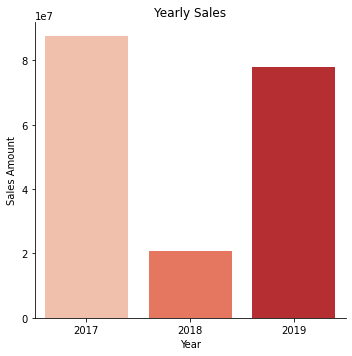

In [34]:
Yearly_Sales01 = Yearly_Sales.groupby('Invoice_Year').sum().reset_index()
sns.catplot(y = 'Sales Amount', x = 'Invoice_Year', data = Yearly_Sales01, palette='Reds',kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Amount')
plt.title('Yearly Sales')
Yearly_Sales01[['Invoice_Year', 'Sales Amount']]

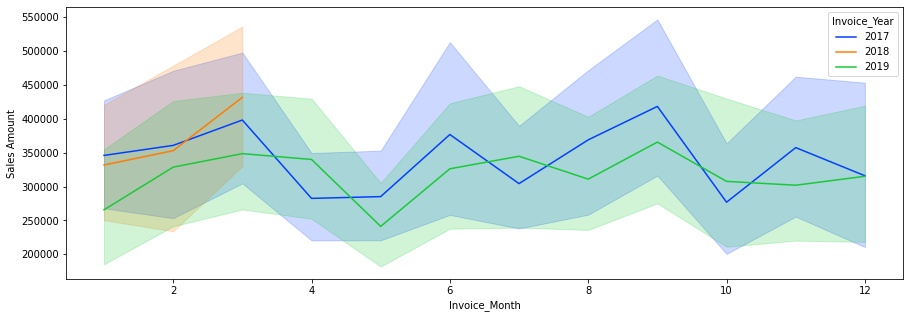

In [35]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Amount', x = 'Invoice_Month',
             data= sales_data2.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')

Obseravtions:
From this plot, it is clear that Sales decreased continuously & then it started to increase from 2018 to 2019.

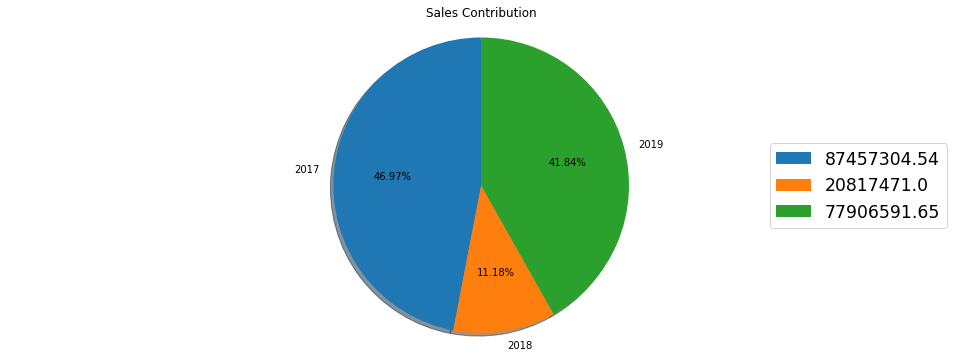

In [36]:
#Plotting Piechart to know Sales Share among 3 years
plt.figure(figsize=(17,6))
plt.pie('Sales Amount',labels='Invoice_Year',data=Yearly_Sales01,
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Sales Contribution')
plt.legend(round(Yearly_Sales01['Sales Amount'],2), loc=7, fontsize = 'xx-large')
plt.show()

Observations:
From 2017-19 Highest Sales Amount 2017>2019>2018.

Text(0, 0.5, 'Count')

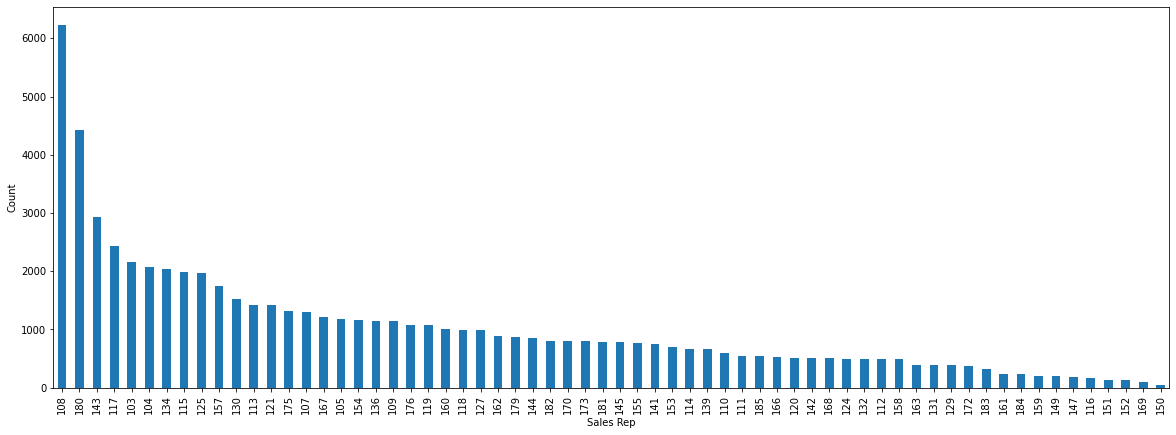

In [37]:
plt.figure(figsize=(20, 7))
sales_data2['Sales Rep'].value_counts().plot.bar()
plt.xlabel('Sales Rep')
plt.ylabel('Count')

Sales Rep "108" were used most often while sales rep "150" has been used the least.

# Yearly-Monthwise Records:

In [38]:
Yearly_Monthwise_Sales = sales_data2.groupby(['Invoice_Year','Invoice_Month']).sum().reset_index()
Yearly_Monthwise_Sales.iloc[:,6:].describe()

,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,27.000000,2.700000e+01,27.000000
mean,6.895606e+06,1.138197e+07,4.486368e+06,2.879604e+06,4.016002e+06,332258.740741,1.244452e+06,685915.941545
std,1.143812e+06,2.220965e+06,1.231585e+06,5.152791e+05,6.506092e+05,55396.534583,2.116445e+05,117490.201952
min,3.187481e+06,4.900167e+06,1.712686e+06,1.290189e+06,1.897292e+06,130314.000000,5.042254e+05,270807.438237
25%,6.461181e+06,1.077866e+07,4.024413e+06,2.622197e+06,3.688586e+06,306638.500000,1.143268e+06,620357.646120
50%,6.895858e+06,1.152212e+07,4.797025e+06,2.882060e+06,4.092856e+06,339909.000000,1.259842e+06,696506.820154
75%,7.600667e+06,1.278649e+07,5.277200e+06,3.134162e+06,4.370919e+06,366618.000000,1.365313e+06,753245.775603
max,8.786342e+06,1.472000e+07,6.112159e+06,3.810222e+06,5.041842e+06,404709.000000,1.558636e+06,876228.847968


**************************************************Yearly-Monthwise Sales Trend**************************************************


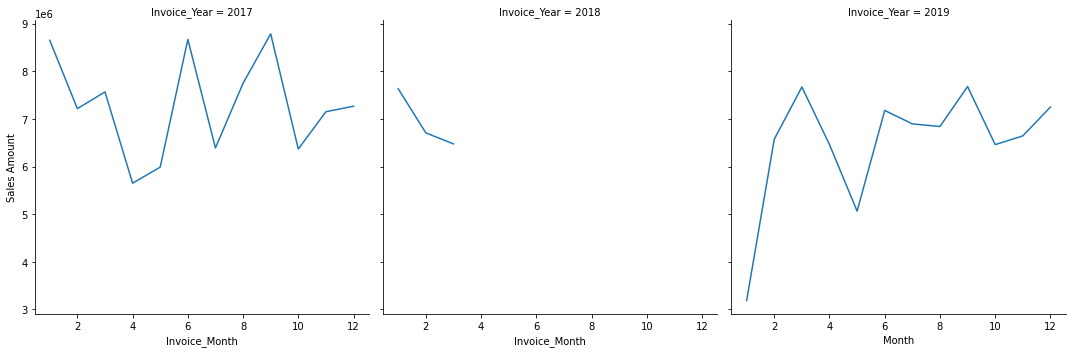

In [39]:
sns.relplot(x ='Invoice_Month',y = 'Sales Amount', data=Yearly_Monthwise_Sales,height=5,
            kind = 'line', aspect = 1, col = 'Invoice_Year')
plt.xlabel('Month')
plt.ylabel('Sales Amount')
print('*'*50+'Yearly-Monthwise Sales Trend'+'*'*50)

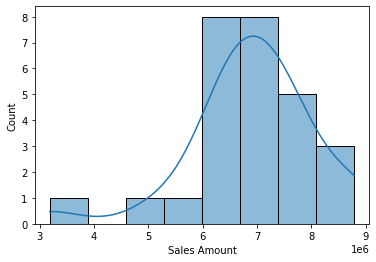

In [40]:
sns.histplot(Yearly_Monthwise_Sales['Sales Amount'], kde = True)

# Monthly Records:

In [41]:
Monthly_sales = sales_data2.groupby(['Invoice_Year','Invoice_Month', 'Invoice_Day']).sum().reset_index()
Monthly_sales.iloc[:,5:].describe()

,Sales Quantity,Sales Amount,Sales Amount Based on List Price,Discount Amount,Sales Margin Amount,Sales Cost Amount,Sales Rep,List Price,Sales Price
count,559.000000,5.590000e+02,5.590000e+02,5.590000e+02,559.000000,559.000000,559.000000,559.000000,559.000000
mean,5265.107335,3.330615e+05,5.497554e+05,2.166940e+05,139086.442308,193975.037460,16048.275492,60107.716035,33130.108089
std,4781.445858,2.302024e+05,3.889088e+05,1.820144e+05,97025.174636,136009.114595,8052.820326,31837.127941,17179.276121
min,4.000000,5.433650e+03,0.000000e+00,-2.555238e+05,2349.360000,0.000000,345.000000,0.000000,1063.117667
25%,2106.500000,1.572531e+05,2.560595e+05,8.888978e+04,62655.095000,92237.325000,10063.000000,40370.544400,22084.687514
50%,3118.000000,2.688299e+05,4.487250e+05,1.630951e+05,113446.860000,150428.990000,14666.000000,54665.030000,30440.440019
75%,6577.000000,4.696801e+05,7.178838e+05,2.891977e+05,195474.320000,267013.720000,19652.500000,72573.307400,41211.201040
max,23710.000000,1.379283e+06,2.408920e+06,1.029636e+06,619085.330000,760197.860000,55866.000000,231196.720800,128415.923388


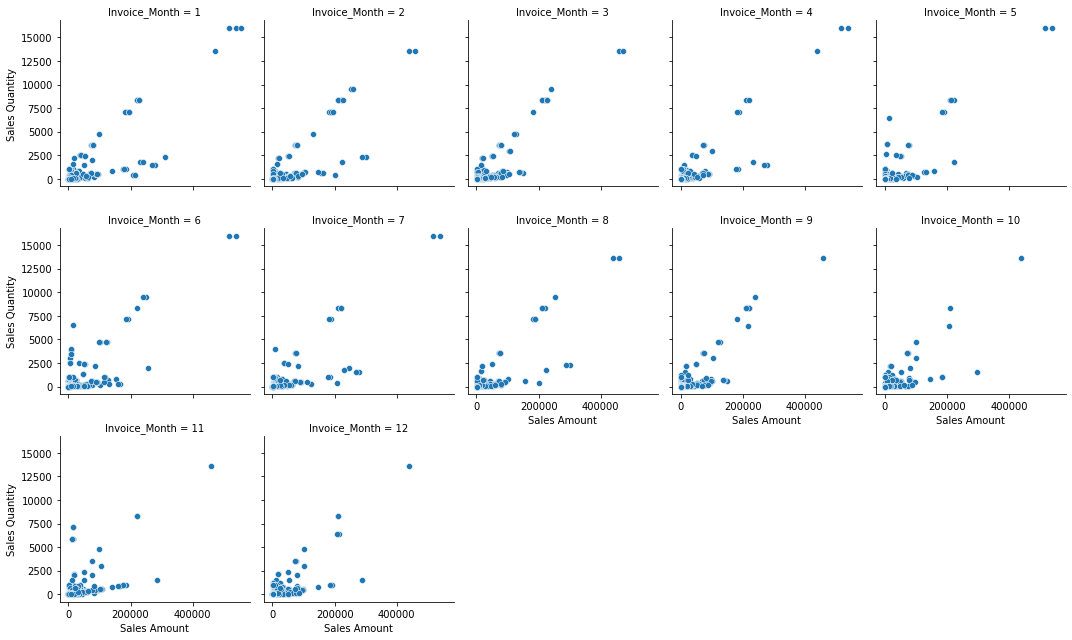

In [42]:
sns.relplot(y ='Sales Quantity',x = 'Sales Amount', data=sales_data2,height = 3,aspect=1,
            col = 'Invoice_Month',col_wrap=5, palette='muted')

**************************************************Monthly Sales Trend in 2017**************************************************


<Figure size 576x1440 with 0 Axes>

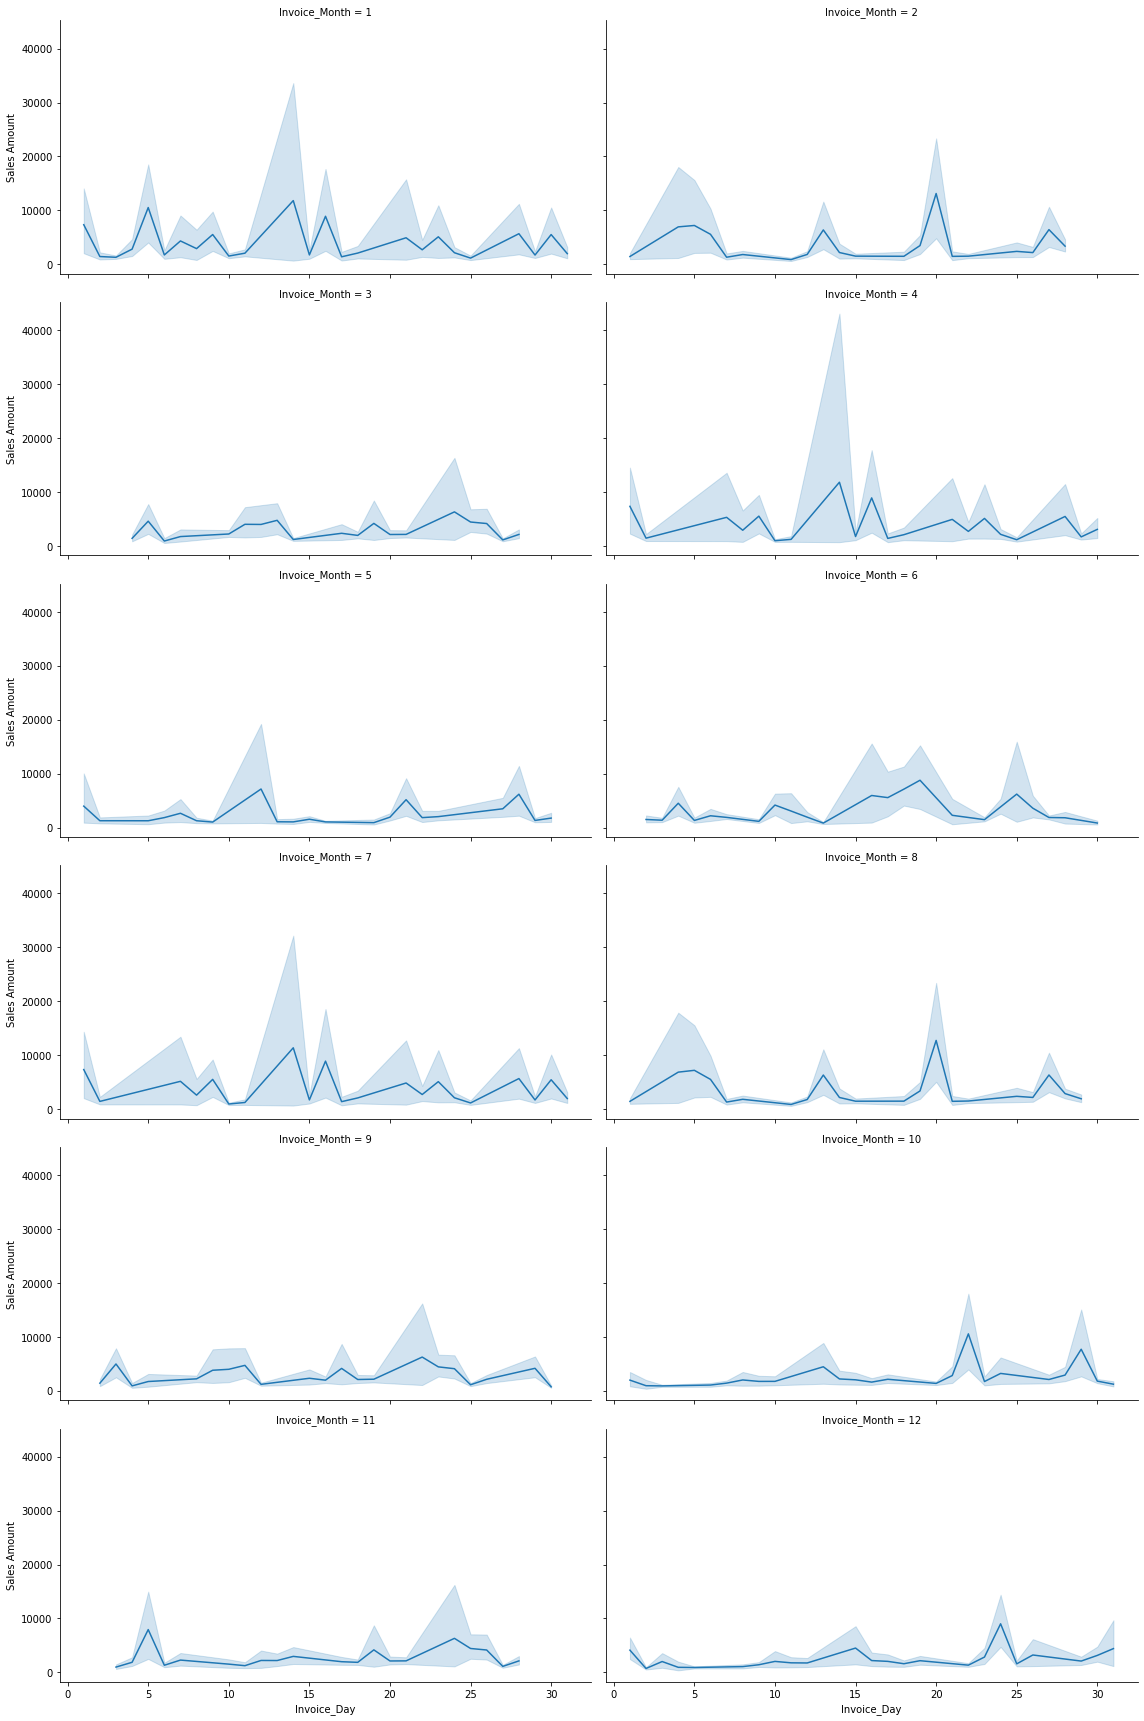

In [43]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2017'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2017'+'*'*50)

**************************************************Monthly Sales Trend in 2018**************************************************


<Figure size 576x1440 with 0 Axes>

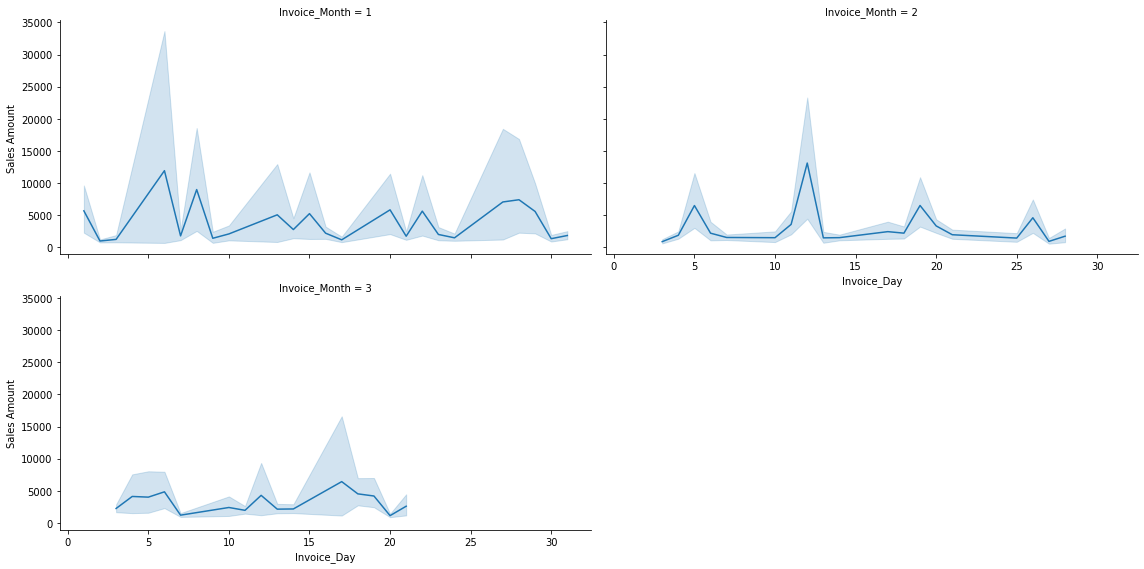

In [44]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2018'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2018'+'*'*50)

**************************************************Monthly Sales Trend in 2019**************************************************


<Figure size 576x1440 with 0 Axes>

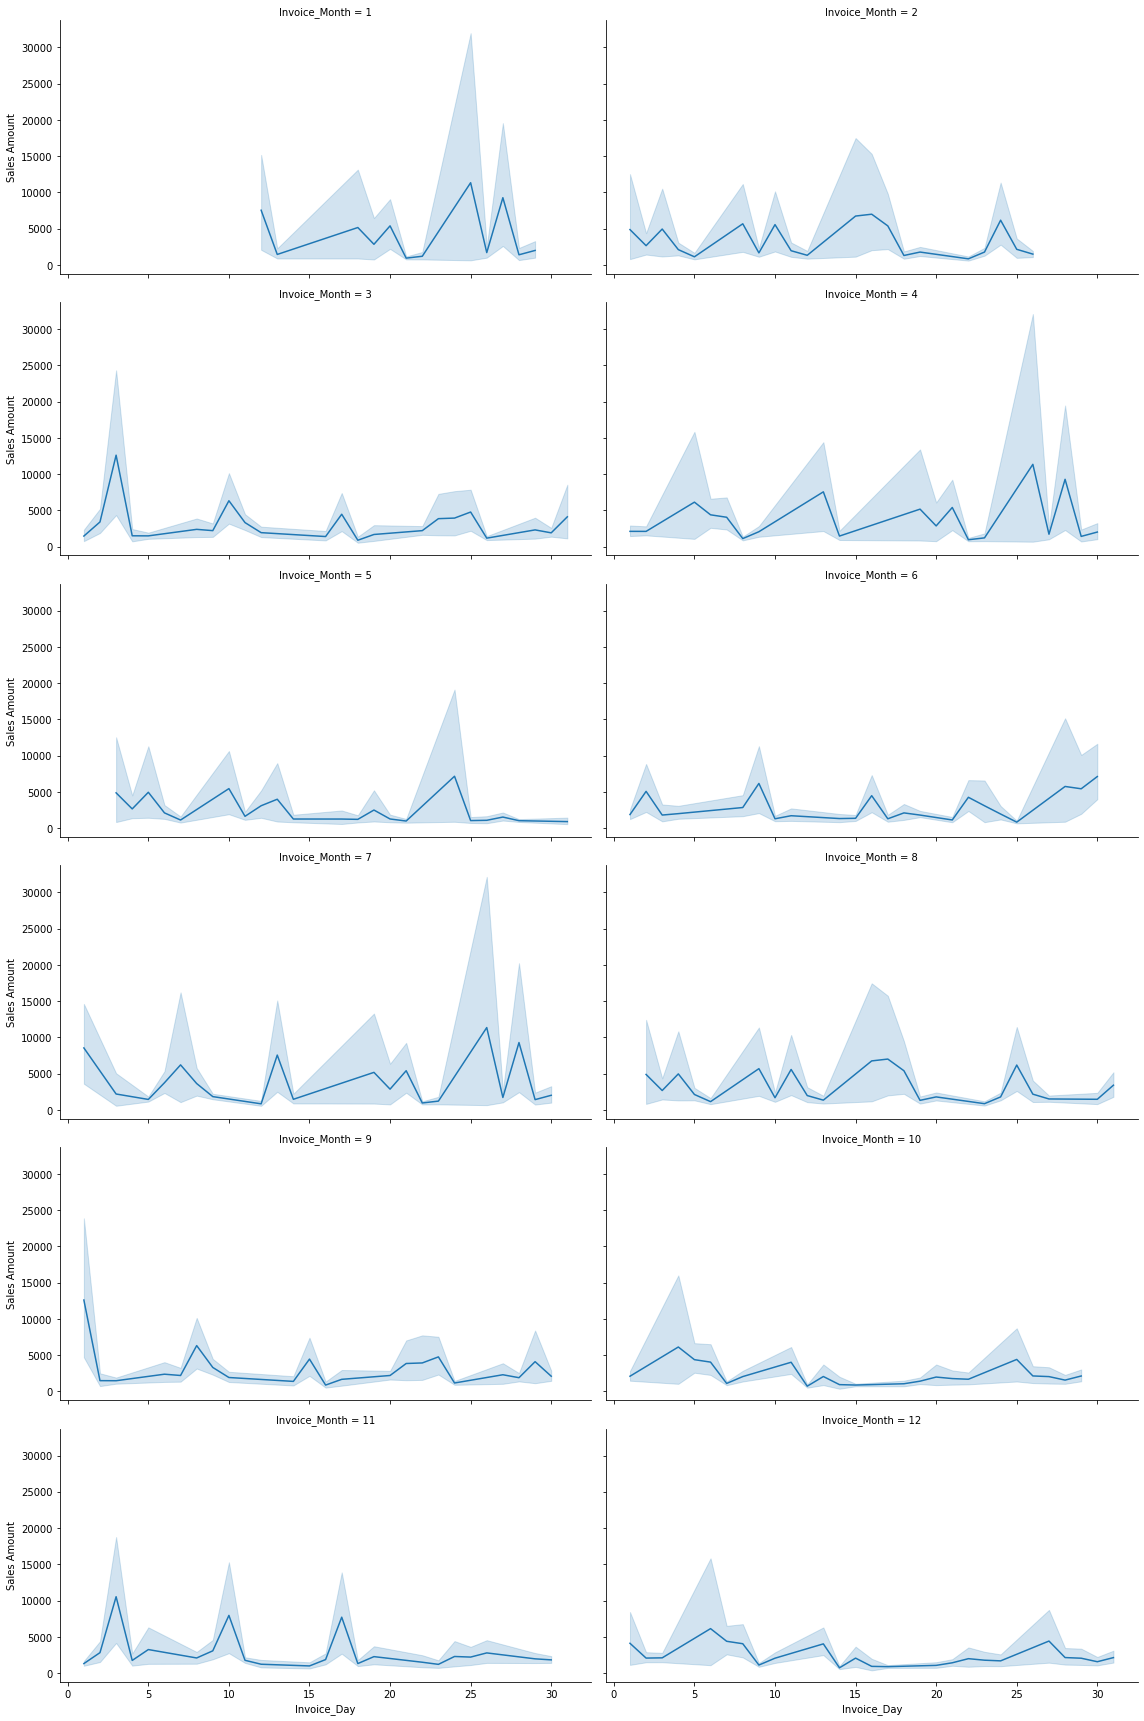

In [45]:
plt.figure(figsize=(8, 20))
sns.relplot(x ='Invoice_Day',y = 'Sales Amount', data= sales_data2.query('Invoice_Year == 2019'),
            kind = 'line', col = 'Invoice_Month', col_wrap =2, height = 4, aspect = 2)
plt.ylabel('Sales Amount')
print('*'*50+'Monthly Sales Trend in 2019'+'*'*50)

# Profits Records:

,Invoice_Year,Sales Margin Amount
0,2017,37419472.46
1,2018,9147547.74
2,2019,31182301.05


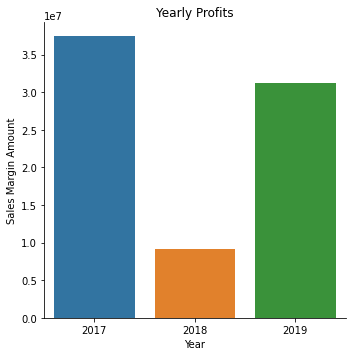

In [46]:
sns.catplot(y = 'Sales Margin Amount', x = 'Invoice_Year', data = Yearly_Sales01,kind="bar")
plt.xlabel('Year')
plt.ylabel('Sales Margin Amount')
plt.title('Yearly Profits')
Yearly_Sales01[['Invoice_Year', 'Sales Margin Amount']]

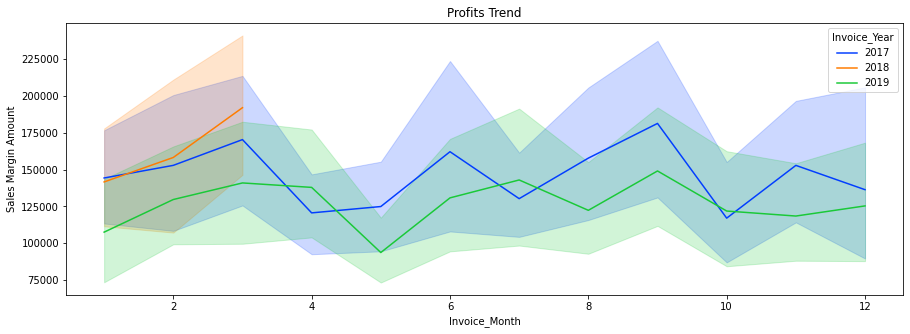

In [47]:
plt.figure(figsize = (15,5))
sns.lineplot(y ='Sales Margin Amount', x = 'Invoice_Month',
             data= sales_data2.groupby(['Invoice Date','Invoice_Year','Invoice_Month']).sum(),
             hue = 'Invoice_Year', palette='bright')
plt.title('Profits Trend')
plt.show()

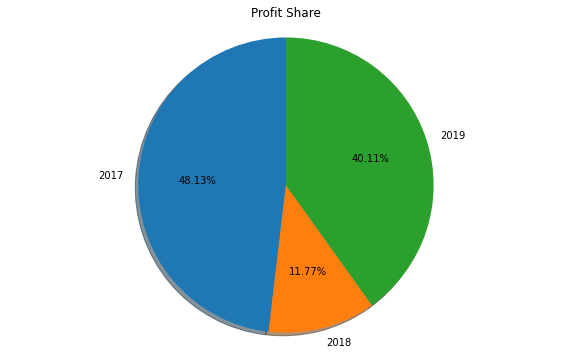

In [48]:
plt.figure(figsize=(10,6))
plt.pie('Sales Margin Amount',labels='Invoice_Year',data=Yearly_Sales01[['Invoice_Year', 'Sales Margin Amount']],
        autopct='%1.2f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.title('Profit Share')
plt.show()

# Top 10 Records:

In [49]:
Top10byCustKey17 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2017].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey17 = Top10byCustKey17.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10021485,5176926.16
1,10025024,3250809.87
2,10025052,1761731.21
3,10025919,1415771.68
4,10025241,1267256.40
5,10023023,870216.36
6,10020184,843138.90
7,10009606,835041.55
8,10012715,782863.50
9,10023715,729615.06


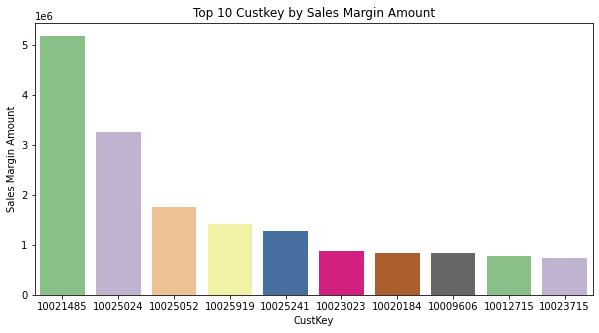

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey17, palette = 'Accent',
            order = Top10byCustKey17.CustKey)
plt.title('Top 10 Custkey by Sales Margin Amount')
Top10byCustKey17[['CustKey', 'Sales Margin Amount']]

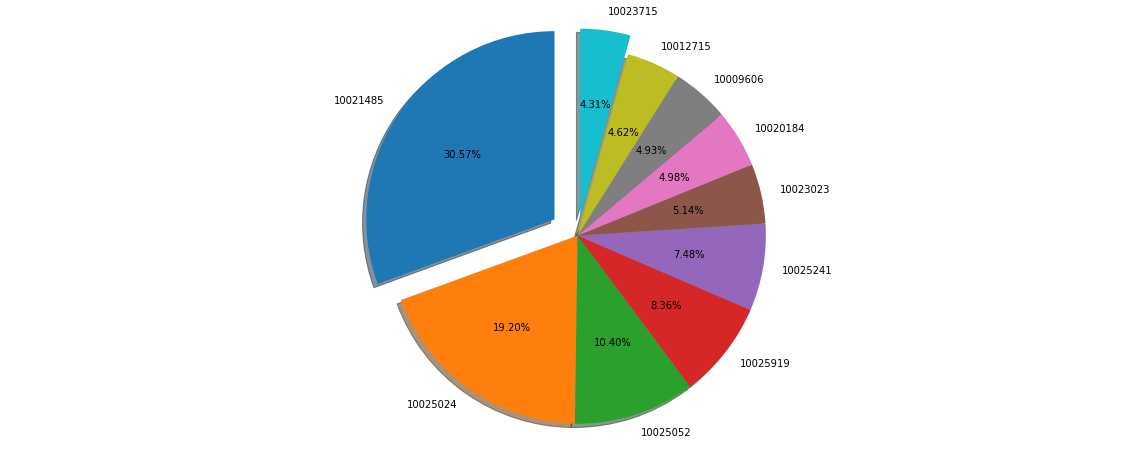

In [60]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey17,
        autopct='%1.2f%%',shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.show()

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10021485 contributed around 30.57% of the Sales Margin Amount in 2017.

In [61]:
Top10byCustKey18 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2018].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey18 = Top10byCustKey18.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10025039,1398188.29
1,10002154,1154085.14
2,10006919,509760.00
3,10025552,332110.69
4,10017638,233470.15
5,10019066,207997.56
6,10026299,195547.06
7,10023471,195034.39
8,10007183,162898.91
9,10010935,152253.65


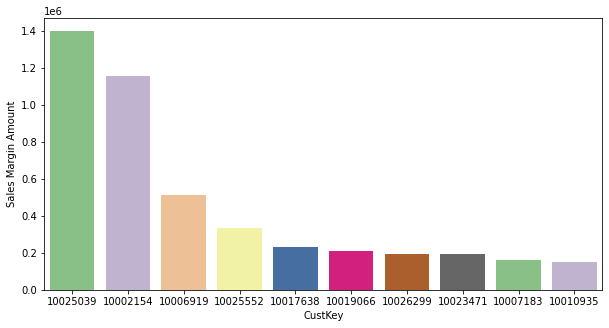

In [63]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey18, palette = 'Accent',
            order = Top10byCustKey18.CustKey)
Top10byCustKey18[['CustKey', 'Sales Margin Amount']]

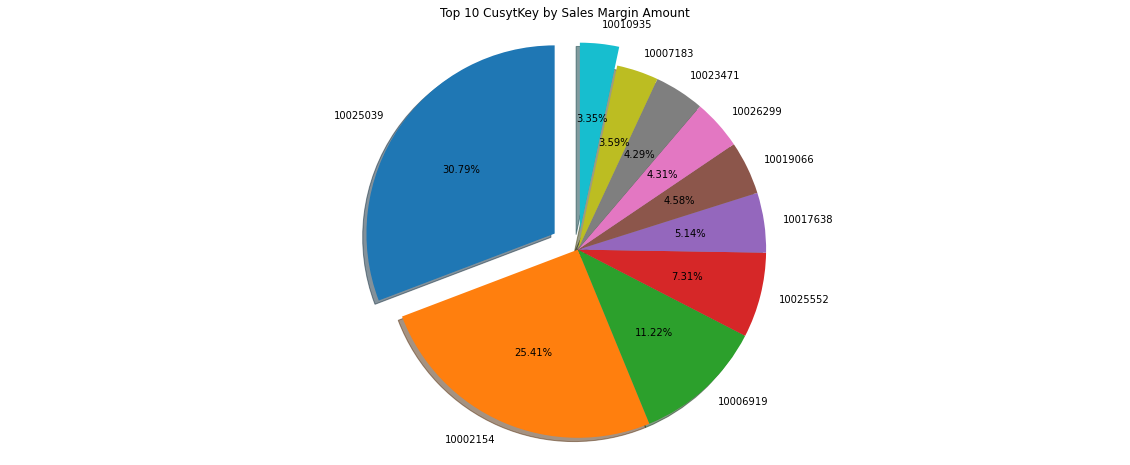

In [64]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey18,autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10025039 contributed around 30.79% of the Sales Margin Amount in 2018.

In [65]:
Top10byCustKey19 = Yearly_Sales[Yearly_Sales['Invoice_Year']==2019].groupby(['Invoice_Year','CustKey']).sum()
Top10byCustKey19 = Top10byCustKey19.sort_values('Sales Margin Amount', ascending=False).reset_index().head(10)

,CustKey,Sales Margin Amount
0,10009676,4473954.12
1,10021300,2840289.66
2,10025737,1544679.20
3,10019194,1221320.93
4,10025353,1114700.90
5,10025571,798919.82
6,10026606,712503.86
7,10012226,702720.45
8,10016548,683579.49
9,10004245,619735.78


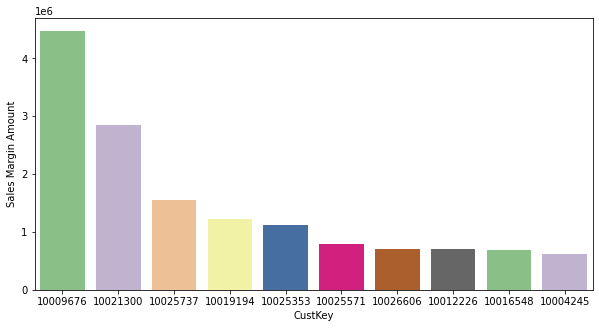

In [67]:
plt.figure(figsize=(10,5))
sns.barplot(x='CustKey', y='Sales Margin Amount',data = Top10byCustKey19, palette = 'Accent',
            order = Top10byCustKey19.CustKey)
Top10byCustKey19[['CustKey', 'Sales Margin Amount']]

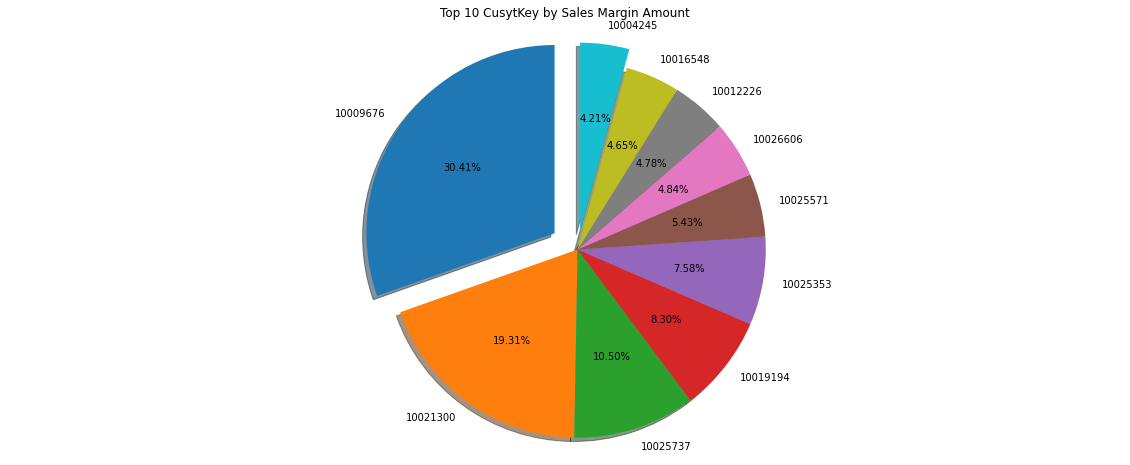

In [68]:
plt.figure(figsize=(20,8))
plt.pie('Sales Margin Amount',labels='CustKey',data=Top10byCustKey19,autopct='%1.2f%%',
        shadow=True,startangle=90, explode = (0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0.1))
plt.axis('equal')
plt.title('Top 10 CusytKey by Sales Margin Amount')
plt.show()

Observations:
Among the 10 CustKey that generated the most Sales Margin Amount, CustKey-10009676 contributed around 30.41% of the Sales Margin Amount in 2019.